In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error

In [3]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

energy_consumption_data_train.head()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2,42923.00
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2,40497.00
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2,40872.00
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2,42470.75
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2,46082.25


In [33]:
gridParams = {
    'n_estimators': [200,300,500]
    #'max_depth': [None, 10, 50, 100],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2', None],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.0, 0.1, 0.5],
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'n_estimators': 500}
Best Estimator:  RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
Best Score (MSE):  -109184393.0209384
RMSE:  11126.09532667055
NRMSE:  0.1642810047348219
R2 Score:  0.25839455468053174


In [5]:
gridParams = {
    #'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2', None],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.0, 0.1, 0.5],
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'max_depth': 9}
Best Estimator:  RandomForestRegressor(max_depth=9, n_jobs=-1, random_state=42)
Best Score (MSE):  -106686272.60603717
RMSE:  11160.459562666367
NRMSE:  0.1647884056738382
R2 Score:  0.253806411217371


In [8]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    'min_samples_split': [0.0, 0.05, 0.1, 0.15],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2', None],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.0, 0.1, 0.5],
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site-pack

Best Parameters:  {'min_samples_split': 0.05, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(min_samples_split=0.05, n_estimators=50, n_jobs=-1,
                      random_state=42)
Best Score (MSE):  -111682044.17831102
RMSE:  11427.734363123338
NRMSE:  0.16873481917023503
R2 Score:  0.21763821264444683


In [11]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    #'max_features': ['auto', 'sqrt', 'log2', None],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.0, 0.1, 0.5],
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 110.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site-pac

Best Parameters:  {'min_samples_leaf': 0.01, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(min_samples_leaf=0.01, n_estimators=50, n_jobs=-1,
                      random_state=42)
Best Score (MSE):  -109224341.08075142
RMSE:  11325.58605849698
NRMSE:  0.16722656082593065
R2 Score:  0.23156218981542953


In [12]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [0.0, 0.05, 0.1, 0.15, 0.2],
    'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.0, 0.1, 0.5],
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'max_features': 4, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(max_features=4, n_estimators=50, n_jobs=-1,
                      random_state=42)
Best Score (MSE):  -108086633.31027666
RMSE:  11122.130401746852
NRMSE:  0.16422246111902153
R2 Score:  0.2589230214788525


In [13]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [0.0, 0.05, 0.1, 0.15, 0.2],
    #'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.0, 0.1, 0.5],
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'bootstrap': True, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
Best Score (MSE):  -110924080.10520056
RMSE:  11208.140545737615
NRMSE:  0.16549243341903574
R2 Score:  0.24741684517522122


In [14]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [0.0, 0.05, 0.1, 0.15, 0.2],
    #'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.0, 0.1, 0.5],
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'n_estimators': 50, 'oob_score': True}
Best Estimator:  RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=42)
Best Score (MSE):  -110924080.10520056
RMSE:  11208.140545737615
NRMSE:  0.16549243341903574
R2 Score:  0.24741684517522122


In [15]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [0.0, 0.05, 0.1, 0.15, 0.2],
    #'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'oob_score': [True, False],
    'max_samples': [None, 0.5, 0.8, 1.0],
    #'ccp_alpha': [0.0, 0.1, 0.5],
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'max_samples': 0.5, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(max_samples=0.5, n_estimators=50, n_jobs=-1,
                      random_state=42)
Best Score (MSE):  -109056163.83321288
RMSE:  11154.244325053953
NRMSE:  0.16469663534025267
R2 Score:  0.2546372872311342


In [17]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [0.0, 0.05, 0.1, 0.15, 0.2],
    #'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1]
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'ccp_alpha': 0.04, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(ccp_alpha=0.04, n_estimators=50, n_jobs=-1,
                      random_state=42)
Best Score (MSE):  -110924073.52747568
RMSE:  11208.140529259732
NRMSE:  0.16549243317573356
R2 Score:  0.2474168473880729


In [26]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [0.0, 0.05, 0.1, 0.15, 0.2],
    #'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1]
    'max_leaf_nodes': range(210,230),
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'max_leaf_nodes': 222, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(max_leaf_nodes=222, n_estimators=50, n_jobs=-1,
                      random_state=42)
Best Score (MSE):  -106873905.46790525
RMSE:  11179.498978092004
NRMSE:  0.1650695298421877
R2 Score:  0.2512582709578538


In [28]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [0.0, 0.05, 0.1, 0.15, 0.2],
    #'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1]
    #'max_leaf_nodes': [None, 10, 50, 100],
    'min_impurity_decrease': [0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, .87, .88, .89, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, 1],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'min_impurity_decrease': 0.84, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(min_impurity_decrease=0.84, n_estimators=50, n_jobs=-1,
                      random_state=42)
Best Score (MSE):  -110829717.37820248
RMSE:  11212.102117625498
NRMSE:  0.16555092752599443
R2 Score:  0.24688474278863415


In [35]:
gridParams = {
    'n_estimators': [50],
    #'max_depth': range(1, 10),
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [0.0, 0.05, 0.1, 0.15, 0.2],
    #'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'bootstrap': [True, False],
    #'oob_score': [True, False],
    #'max_samples': [None, 0.5, 0.8],
    #'ccp_alpha': [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1]
    #'max_leaf_nodes': [None, 10, 50, 100],
    #'min_impurity_decrease': [0.0, 0.1, 0.5],
    'min_weight_fraction_leaf': [0.01, 0.02, 0.03, 0.04, 0.05],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'min_weight_fraction_leaf': 0.01, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(min_weight_fraction_leaf=0.01, n_estimators=50, n_jobs=-1,
                      random_state=42)
Best Score (MSE):  -108016645.61569774
RMSE:  11261.08512195793
NRMSE:  0.1662741801074614
R2 Score:  0.24029000631556097


c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
64800 fits failed out of a total of 116640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38880 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib

Best Parameters:  {'bootstrap': True, 'ccp_alpha': 0.03, 'max_depth': 9, 'max_features': 5, 'max_leaf_nodes': 221, 'max_samples': 0.6, 'min_impurity_decrease': 0.7, 'min_samples_leaf': 0.01, 'min_samples_split': 0.05, 'min_weight_fraction_leaf': 0.05, 'n_estimators': 50, 'oob_score': True}
Best Estimator:  RandomForestRegressor(ccp_alpha=0.03, max_depth=9, max_features=5,
                      max_leaf_nodes=221, max_samples=0.6,
                      min_impurity_decrease=0.7, min_samples_leaf=0.01,
                      min_samples_split=0.05, min_weight_fraction_leaf=0.05,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=42)
Best Score (MSE):  -113212578.17279449
RMSE:  11566.318580838815
NRMSE:  0.17078106754922504
R2 Score:  0.19854774098363825
MAE:  9164.585330305086
MAPE:  39.85226695582887


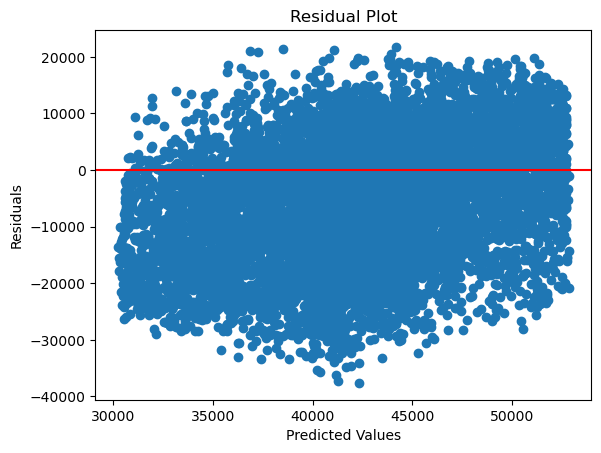

In [40]:
gridParams = {
    'n_estimators': [50],
    'max_depth': range(8, 10),
    'min_samples_split': [0.0, 0.05, 0.1],
    'min_samples_leaf': [0.0, 0.01, 0.02],
    'max_features': [3,4,5],
    'bootstrap': [True],
    'oob_score': [True],
    'max_samples': [0.4, 0.5, 0.6],
    'ccp_alpha': [0.03, 0.04, 0.05],
    'max_leaf_nodes': range(221,223),
    'min_impurity_decrease': [0.7,0.8, 0.8, 0.9],
    'min_weight_fraction_leaf': [0.05, 0.1, 0.15],
}

regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

plt.scatter(Y_PRED, Y_TEST - Y_PRED)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()